C:\Users\user\AppData\Local\Temp\ipykernel_9220\2988509386.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2_e.drop([2,3,4],axis=0,inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_9220\2988509386.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3_e['구'] = d3['역사도로명주소'].str.split().str[1]


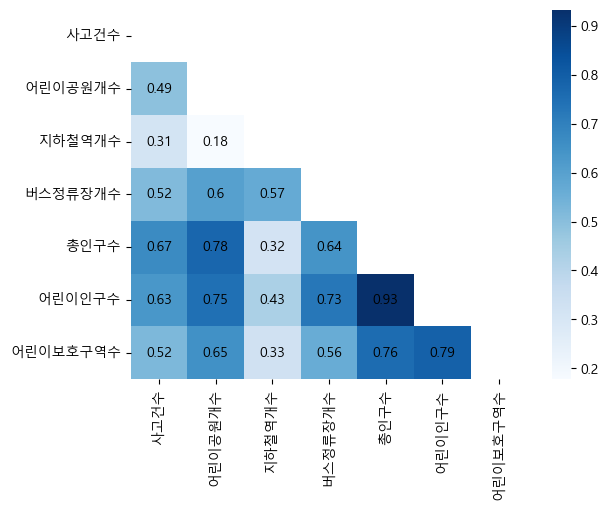

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl


##################17~22년 어린이보행사고######################
filename1 = [0] * 7
d1 = [0] * 7
filename1[1] = 'C:/Users/user/Downloads/AI/22년 보행어린이사고.csv'
d1[1] = pd.read_csv(filename1[1])
d1[1].columns = d1[1].iloc[0,]
d1[1].drop(0,axis=0,inplace=True)
d1[1].drop(d1[1].columns[3:],axis=1,inplace=True)
for i in range(2,7):
    filename1[i] = 'C:/Users/user/Downloads/AI/22년 보행어린이사고 (' + str(i) + ').csv'
    d1[i] = pd.read_csv(filename1[i])
    d1[i].columns = d1[i].iloc[0,]
    d1[i].drop(0,axis=0,inplace=True)
    d1[i].drop(d1[i].columns[3:],axis=1,inplace=True)

d1 = pd.concat([d1[1],d1[2],d1[3],d1[4],d1[5],d1[6]])


d1['구'] = d1['시도'].str.split().str[1]
d1['구'] = d1['구'].str.replace('1','')
d1['구'] = d1['구'].str.replace('2','')
d1['구'] = d1['구'].str.replace('3','')
d1['구'] = d1['구'].str.replace('4','')
d1_e = d1[['사고건수','구']]
d1_e.loc[:,'사고건수'] = d1_e.loc[:,'사고건수'].astype(int)


################################어린이 공원####################################

filename2 = 'C:/Users/user/Downloads/AI/어린이공원.csv'
d2 = pd.read_csv(filename2)

d2.drop([0,1],axis=0,inplace=True)
d2.columns = d2.iloc[0,]
d2.rename(columns={'자치구별(2)':'구','어린이공원':'어린이공원개수'},inplace=True)
d2_e = d2[['구','어린이공원개수']]
d2_e.drop([2,3,4],axis=0,inplace=True)
d2_e = d2_e.iloc[:,:2]
d2_e.drop(30,axis=0,inplace=True)


########################지하철 역개수################################

filename3 = 'C:/Users/user/Downloads/AI/지하철역.csv'
d3 = pd.read_csv(filename3)
d3_e = d3[(d3['역사도로명주소'].str.split().str[0]=='서울시') | (d3['역사도로명주소'].str.split().str[0]=='서울특별시')]
d3_e['구'] = d3['역사도로명주소'].str.split().str[1]
d3_e = d3_e.groupby('구').역번호.count()
d3_e = d3_e.reset_index()
d3_e = d3_e.rename(columns={'역번호':'지하철역개수'})




########################버스 정류장개수##############################

filename4 = 'C:/Users/user/Downloads/AI/서울시 시내버스 정류소 현황_20230930기준 - 시내버스 정류장.csv'
d4 = pd.read_csv(filename4)

d4.rename(columns={'자치구':'구','노선수':'버스정류장개수'},inplace=True)
d4_e = d4.groupby('구')['버스정류장개수'].sum()
d4_e = d4_e.reset_index()

#########################어린이인구수,총인구수###########################

filename5 = 'C:/Users/user/Downloads/AI/2022서울인구수.csv'
d5 = pd.read_csv(filename5,encoding='cp949')

d5_e = d5.loc[1:,['행정구역','2022년_계_총인구수','2022년_계_연령구간인구수']]
d5_e['구'] = d5_e['행정구역'].str.split().str[-2]
d5_e.drop('행정구역',axis=1,inplace=True)
d5_e.rename(columns={'2022년_계_총인구수':'총인구수','2022년_계_연령구간인구수':'어린이인구수'},inplace=True)
d5_e['총인구수'] = d5_e['총인구수'].str.replace(',','')
d5_e['어린이인구수'] = d5_e['어린이인구수'].str.replace(',','')
d5_e.loc[:,['총인구수','어린이인구수']] = d5_e.loc[:,['총인구수','어린이인구수']].astype(int)

#########################어린이보호구역수##############################

filename6 = 'C:/Users/user/Downloads/AI/서울시 행정동별 어린이 보호구역 지정 통계(2023. 6월말 기준).csv'
d6 = pd.read_csv(filename6,encoding='cp949')

d6_e = d6.iloc[1:,[0,2]]
d6_e = d6_e.rename(columns={'자치구명':'구',' 계 ':'어린이보호구역수'})
d6_e.iloc[:,1] = d6_e.iloc[:,1].astype(int)
d6_e = d6_e.groupby('구').sum()
d6_e = d6_e.reset_index()



#########################합치기 및 csv저장#############################

all = pd.concat([d1_e,d2_e,d3_e,d4_e,d5_e,d6_e])
all = all.groupby('구').sum()
all = all.reset_index()
all.to_csv('all.csv',mode='w')
all.drop('구',axis=1,inplace=True)


##########################상관관계 그리기################################

all_corr = all.corr()
mask = np.triu(np.ones_like(all_corr))
heat = sns.heatmap(all_corr, annot=True, annot_kws=dict(color='black'), cmap='Blues',mask=mask)
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False
plt.show()







